In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL
from PIL import Image
from IPython.display import display
import os
import json
from tqdm.notebook import tqdm

In [6]:
# dnn 모델 불러오기

detector = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt" , "./res10_300x300_ssd_iter_140000.caffemodel")

In [17]:
# cv모델 불러오기 dnn 아님. 여기서 사용하지 않음

# face_cascade2 = cv2.CascadeClassifier('/content/drive/MyDrive/기업연계프로젝트/haarcascade_profileface.xml')

In [203]:
def drawBox(detections_df, image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    for idx, instance in detections_df.iterrows():
        
        instance = detections_df.iloc[idx, :]
        left = int(instance["left"]); right = int(instance["right"])
        bottom = int(instance["bottom"]); top = int(instance["top"])

        
        cv2.rectangle(image, (left*int(aspect_ratio_x), top*int(aspect_ratio_y)), 
                    (right*int(aspect_ratio_x), bottom*int(aspect_ratio_y)), (255, 0, 0),50)
    
    
    plt.imshow(image)
    plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

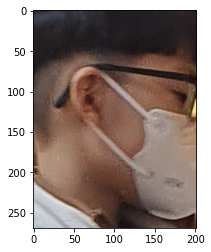

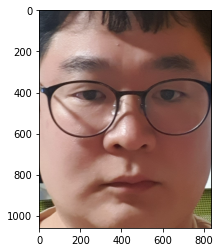

2


In [204]:
lst = sorted(os.listdir("./images"))
t = 0
for f in tqdm(lst):
    image = cv2.imread(os.path.join("./images", f))
    base_img = image.copy()
    box_img = image.copy()
    original_size = base_img.shape
    target_size = (300, 300)
    image = cv2.resize(image, target_size)
    aspect_ratio_x = (original_size[1] / target_size[1])
    aspect_ratio_y = (original_size[0] / target_size[0])
    imageBlob = cv2.dnn.blobFromImage(image = image)
    detector.setInput(imageBlob)
    detections = detector.forward()
    column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
    detections_df = pd.DataFrame(detections[0][0], columns = column_labels)
    detections_df = detections_df[detections_df['is_face'] == 1]
    detections_df = detections_df[detections_df['confidence'] >= 0.2]
    detections_df['left'] = (detections_df['left'] * 300).astype(int)
    detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
    detections_df['right'] = (detections_df['right'] * 300).astype(int)
    detections_df['top'] = (detections_df['top'] * 300).astype(int)
    
    drawBox(detections_df, box_img)
    
    if len(detections_df) >= 2:
        t+=1
        idx = 0
        size = 0
        for i, instance in detections_df.iterrows():
            if (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"]) > size:
                size = (instance["bottom"] - instance["top"]) * (instance["right"] - instance["left"])
                idx = i
        instance = detections_df.iloc[idx, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        detected_face2 = cv2.cvtColor(detected_face, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join("./croped_image", f), detected_face)  

    else:
        t+=1
        instance = detections_df.iloc[0, :]
        left = instance["left"]; right = instance["right"]
        bottom = instance["bottom"]; top = instance["top"]
        detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        # detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
        detected_face2 = cv2.cvtColor(detected_face, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join("./croped_image", f), detected_face)


    plt.imshow(detected_face2)
    plt.show()  

print(t)


In [ ]:
#meta["0"]

{'category': 'training',
 'metadata': {'photo_url': 'https://www.flickr.com/photos/frumkin/1133484654/',
  'photo_title': 'DSCF0899.JPG',
  'author': 'Jeremy Frumkin',
  'country': '',
  'license': 'Attribution-NonCommercial License',
  'license_url': 'https://creativecommons.org/licenses/by-nc/2.0/',
  'date_uploaded': '2007-08-16',
  'date_crawled': '2018-10-10'},
 'image': {'file_url': 'https://drive.google.com/uc?id=1xJYS4u3p0wMmDtvUE13fOkxFaUGBoH42',
  'file_path': 'images1024x1024/00000/00000.png',
  'file_size': 1488194,
  'file_md5': 'ddeaeea6ce59569643715759d537fd1b',
  'pixel_size': [1024, 1024],
  'pixel_md5': '47238b44dfb87644460cbdcc4607e289',
  'face_landmarks': [[131.62, 453.8],
   [142.86, 535.23],
   [154.31, 612.62],
   [179.63, 687.47],
   [230.76, 747.47],
   [298.2, 788.88],
   [375.17, 817.84],
   [439.1, 848.56],
   [500.96, 856.54],
   [554.19, 843.07],
   [600.26, 811.44],
   [652.7, 781.75],
   [697.13, 734.68],
   [725.95, 676.3],
   [738.9, 612.28],
   [743.

In [ ]:
def drawBox(boxes, image):
    for i in range(0, len(boxes)):
        # changed color and width to make it visible
        cv2.rectangle(image, (boxes[i][2], boxes[i][3]), (boxes[i][4], boxes[i][5]), (255, 0, 0), 3)
    plt.imshow(image)